<h1> Exercise Six: Structured Data with Beautiful Soup and Pandas</h1>
    <h4> Using the Library of Congress to extract books on Lebanon </h4>

<h1> Stage One: Import the libraries and Scrape your Page</h1> 
    <ol> 
        <li> Import needed libraries</li>
        <li> Get url</li>
        <li> Send a browser type required for the url </li>
        <li> Pass the retrieved web page to Beautifulsoup so it can create a hierarchy </li>
        <li> Print the output to see the data structure </li>
    </ol>

In [332]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [355]:
url = 'https://www.loc.gov/books/?q=lebanon'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en" prefix="lc: http://loc.gov/#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1" name="viewport">
   <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
   <meta content="$Revision$" name="version">
    <meta content="5C89FB9D99590AB2F55BD95C3A59BD81" name="msvalidate.01"/>
    <link href="http://purl.org/dc/elements/1.1/" rel="schema.dc" title="schema(DC)"/>
    <meta content="eng" name="dc.language"/>
    <meta content="Library of Congress, Washington, D.C. 20540 USA" name="dc.source"/>
    <link href="https://www.loc.gov/books/?fo=json&amp;q=lebanon" rel="alternate" type="application/json"/>
    <meta content="libraryofcongress" property="fb:admins"/>
    <meta content="The Library of Congress" property="og:site_name"/>
    <meta content="article" property="og:type"/>
    <meta content="librarycongress" property="twitter:site"/>
    <title>
     Search results for  Book/Printed Material, Lebanon, A

<h1> Stage Two: Define an Empty Dictionary Reflecting the Data Categories</h1>

In [349]:
source_dict = {'Contributors':[], 'Titles':[], 'Dates':[]}

<h1> Stage Three: Loop through and Store Structured Data</h1>
    <ol> 
        <li>First loop to strip the strings and append the "contributor" entry in dict </li>
        <li>Second loop to strip the strings and append the "date" entry in dict </li>
        <li>Third loop to strip the strings and append the "titles" entry in dict </li>
        <li>Fourth loop to replace missing authors with NA </li>
        <li>Fifth loop to replace missing dates with NA </li>
        <li>print lengths of each key to check if equal </li>
    </ol>

In [371]:
source_dict = {'Contributors':[], 'Titles':[], 'Dates':[]}

for line in soup.find_all(["li"], class_=["contributor"]):
    for str in line.stripped_strings:
        if not ( str.find("Contributor:") == 0 ):
            source_dict['Contributors'].append(str)
          

for line in soup.find_all(["li"], class_=["date"]):
    for str in line.stripped_strings:
        if not ( str.find("Date:") == 0 ):
            source_dict["Dates"].append(str)
print(len(source_dict['Dates']))  


for line in soup.find_all(["span"], class_=["item-description-title"]):
    for str in line.stripped_strings:
        if not ( str.find("Catalog Record - Electronic Resource Available") == 0 ):
            source_dict['Titles'].append(str)

for i in range (len(source_dict['Titles']) - len(source_dict['Contributors'])):
    source_dict['Contributors'].append('NA')
    
for i in range( len(source_dict['Titles']) - len(source_dict['Dates']) ):
    source_dict['Dates'].append('1900')

    
print(len(source_dict['Titles']))

print(len(source_dict['Contributors']))

print(len(source_dict['Dates']))

25
30
30
30


<h1> Stage Four: Convert from Dictionary to DataFrame and Display </h1>
    <h4> Print dataframe </h4>


In [376]:
df = pd.DataFrame(data=source_dict)
display(df)    


,Contributors,Titles,Dates
0,Library of Congress. Federal Research Division...,Lebanon : a country study,1989
1,United States Air Force Culture and Language C...,Expeditionary culture field guide. Lebanon.,2020
2,Library of Congress. Near Eastern and African ...,Expeditionary culture field guide. Lebanon | E...,1974
3,Sons of the American Revolution. Connecticut S...,Commercial companies in Lebanon,1891
4,Law Library of Congress (U.S.). Global Legal R...,The Lebanon war office.,2007
5,"Fergerson, E. A.",Lebanon : post-conflict environmental assessment.,2007
6,Library of Congress. Law Library,Lebanon: Convening Of Parliament.,1905
7,Shaker Collection (Library of Congress) - Macl...,"Souvenir of Lebanon, Pa. ...",1911
8,"Smith, E. Palmer (Ella Palmer) - Roxburgh Publ...",Streams from Lebanon.,1976
9,"[Gale, Daniel]",Gun Laws of Lebanon.,1895


<h1> Stage Five: Plot some Aspect of the Data </h1>
    <h4> Convert dates to numeric then plot their variations </h4>

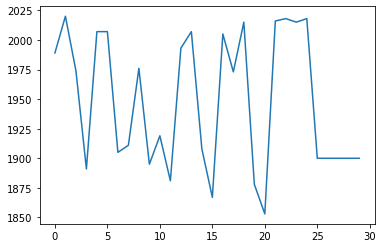

In [377]:
df["Dates"]= pd.to_numeric(df["Dates"])

df["Dates"].plot()

<h1> Bonus Stage: Add On </h1>
    <h4> Save the Figure</h4>

In [369]:
plt.savefig('books_dates_Lebanon.png')

<Figure size 432x288 with 0 Axes>